In [11]:
import glob

import tensorflow as tf

from tensorflow.python.summary.summary_iterator import summary_iterator
from tensorflow.python.framework import tensor_util

from matplotlib import pyplot as plt

In [98]:
metrics = ['accuracy_L1', 'loss', "I_XZ", "I_YZ"]

def event_file(path):
    files = glob.glob(f"{path}/*")
    return files[0]

def read_metrics(path):
    data = dict(zip(metrics,  [[] for x in range(len(metrics))]))
    
    for e in summary_iterator(event_file(path)):
        for v in e.summary.value:
            if v.tag in metrics:
                t = tensor_util.MakeNdarray(v.tensor)
                data[v.tag].append(float(t))
    return data


data = read_metrics("../artifacts-server/vdb-fashion_mnist--2019-11-22--00-57-25/logs/train");

data

{'accuracy_L1': [0.15264992415905,
  0.19081668555736542,
  0.2106834053993225,
  0.22169993817806244,
  0.22598335146903992,
  0.2304500788450241,
  0.23628321290016174,
  0.23466672003269196,
  0.2388499677181244,
  0.23924995958805084,
  0.24086682498455048,
  0.24181661009788513,
  0.24336667358875275,
  0.24851679801940918,
  0.24796676635742188,
  0.2487332969903946,
  0.2496500164270401,
  0.24988332390785217,
  0.24968330562114716,
  0.6634659171104431,
  0.8149821758270264,
  0.8232154250144958,
  0.8253484964370728,
  0.8264487981796265,
  0.8279160261154175,
  0.8282490372657776,
  0.8281493186950684,
  0.8289490938186646,
  0.8289157152175903,
  0.8289327025413513,
  0.829565703868866,
  0.8291491270065308,
  0.82883220911026,
  0.8297489881515503,
  0.8296323418617249,
  0.8291327357292175,
  0.8300656676292419,
  0.8301658034324646,
  0.829899251461029,
  0.8446334004402161,
  0.8497161865234375,
  0.8535491824150085,
  0.8543824553489685,
  0.8543661236763,
  0.854816198

In [95]:
def read_model_metrics(model_path):
    return dict(
        train=read_metrics(f"{model_path}/logs/train"),
        test=read_metrics(f"{model_path}/logs/test")
    )

data = read_model_metrics("../artifacts-server/vdb-fashion_mnist--2019-11-22--00-57-25")

In [99]:
# Fashion MNIST (M=1, K=2, β=0.001)
fmnist_experiments = (
    ("oneshot",      "../artifacts-server/vdb-fashion_mnist--2019-11-21--23-23-38"),
    ("seq/d:1|e:5",  "../artifacts-server/vdb-fashion_mnist--2019-11-21--23-49-41"),
    ("seq/d:1|e:10", "../artifacts-server/vdb-fashion_mnist--2019-11-22--00-24-25"),
    ("seq/d:1|e:20", "../artifacts-server/vdb-fashion_mnist--2019-11-22--00-57-25"),
)

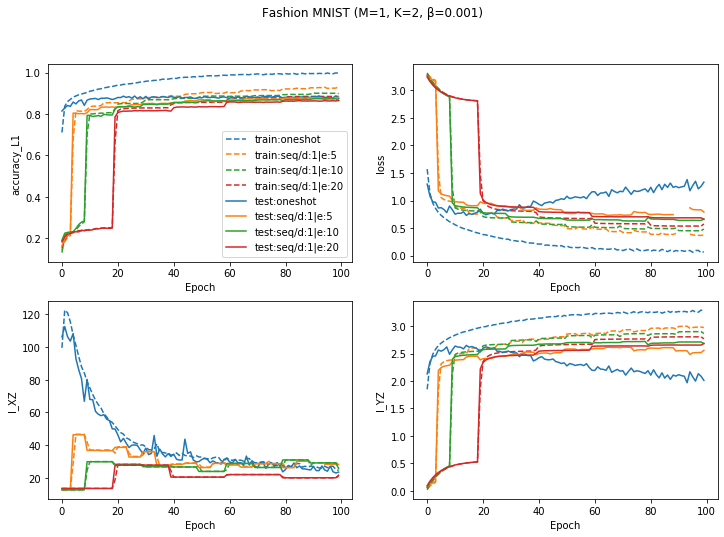

In [107]:
def plot_experiments(experiments, name, sets=['test']):
    cm = plt.get_cmap('tab10')
        
    experiment_metrics = dict()
    experiment_names = []
    total_experiments = len(experiments)
    
    for k, v in experiments:
        experiment_names.append(k)
        experiment_metrics[k] = read_model_metrics(v)

    plt.figure(figsize=(12, 8))
    
    for i, m in enumerate(metrics):
        plt.subplot(2, 2, i+1)
        for t in sets:
            for j, n in enumerate(experiment_names):
                color = cm.colors[j]
                plt.plot(experiment_metrics[n][t][m], "--" if t == "train" else "-", color=color, label=f"{t}:{n}")
        plt.ylabel(m)
        plt.xlabel("Epoch")
        if i == 0:
            plt.legend()
    plt.suptitle(name)

plot_experiments(fmnist_experiments, "Fashion MNIST (M=1, K=2, β=0.001)", sets=["train", "test"])

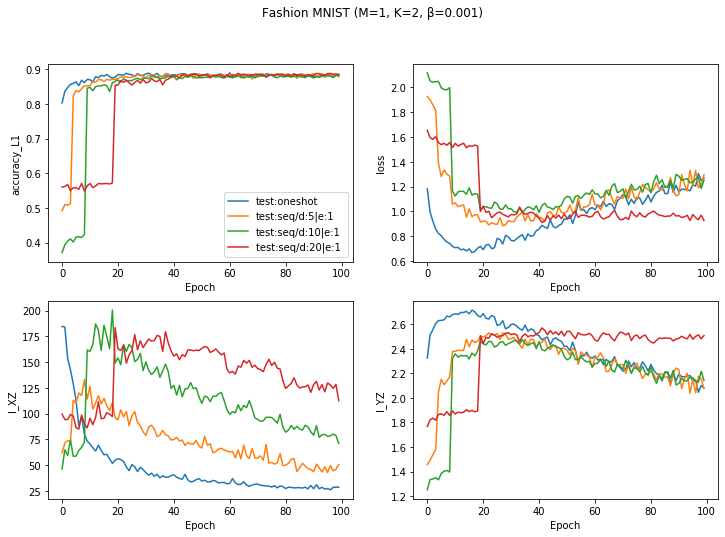

In [110]:
fmnist_experiments_e_more = (
    ("oneshot",      "../artifacts-server/vdb-fashion_mnist--2019-11-22--12-10-34"),
    ("seq/d:5|e:1",  "../artifacts-server/vdb-fashion_mnist--2019-11-22--12-36-06"),
    ("seq/d:10|e:1", "../artifacts-server/vdb-fashion_mnist--2019-11-22--13-16-06"),
    ("seq/d:20|e:1 ", "../artifacts-server/vdb-fashion_mnist--2019-11-22--13-55-40"),
)

plot_experiments(fmnist_experiments_e_more, "Fashion MNIST (M=1, K=2, β=0.001)", sets=["test"])

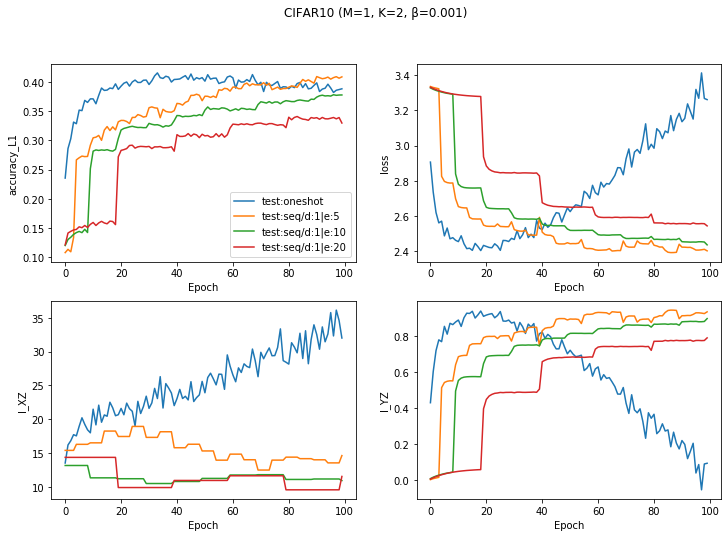

In [111]:
#M=1, K=2, β=0.001)
cifar10_experiments = (
    ("oneshot",      "../artifacts-server/vdb-cifar10--2019-11-22--08-56-14"),
    ("seq/d:1|e:5",  "../artifacts-server/vdb-cifar10--2019-11-22--09-31-02"),
    ("seq/d:1|e:10", "../artifacts-server/vdb-cifar10--2019-11-22--10-12-28"),
    ("seq/d:1|e:20", "../artifacts-server/vdb-cifar10--2019-11-22--10-55-03"),
)
plot_experiments(cifar10_experiments, "CIFAR10 (M=1, K=2, β=0.001)", sets=["test"])